In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
from collections import Counter

In [6]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
#Dropping unnecassary columns

titanic = titanic.drop(['fare','who','embarked','alone'],axis='columns')
titanic


,survived,pclass,sex,age,sibsp,parch,class,adult_male,deck,embark_town,alive
0,0,3,male,22.0,1,0,Third,True,NaN,Southampton,no
1,1,1,female,38.0,1,0,First,False,C,Cherbourg,yes
2,1,3,female,26.0,0,0,Third,False,NaN,Southampton,yes
3,1,1,female,35.0,1,0,First,False,C,Southampton,yes
4,0,3,male,35.0,0,0,Third,True,NaN,Southampton,no
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,Second,True,NaN,Southampton,no
887,1,1,female,19.0,0,0,First,False,B,Southampton,yes
888,0,3,female,NaN,1,2,Third,False,NaN,Southampton,no
889,1,1,male,26.0,0,0,First,True,C,Cherbourg,yes


In [8]:
#check for null values in dataset

titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
class            0
adult_male       0
deck           688
embark_town      2
alive            0
dtype: int64

In [9]:
#dropping the na values

titanic=titanic.dropna()
titanic

,survived,pclass,sex,age,sibsp,parch,class,adult_male,deck,embark_town,alive
1,1,1,female,38.0,1,0,First,False,C,Cherbourg,yes
3,1,1,female,35.0,1,0,First,False,C,Southampton,yes
6,0,1,male,54.0,0,0,First,True,E,Southampton,no
10,1,3,female,4.0,1,1,Third,False,G,Southampton,yes
11,1,1,female,58.0,0,0,First,False,C,Southampton,yes
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,First,False,D,Southampton,yes
872,0,1,male,33.0,0,0,First,True,B,Southampton,no
879,1,1,female,56.0,0,1,First,False,C,Cherbourg,yes
887,1,1,female,19.0,0,0,First,False,B,Southampton,yes


In [10]:
#converting to numerical instead of categorical

titanic['sex']=titanic['sex'].astype('category')
titanic['sex']=titanic['sex'].cat.codes

titanic['class']=titanic['class'].astype('category')
titanic['class']=titanic['class'].cat.codes

titanic['adult_male']=titanic['adult_male'].astype('category')
titanic['adult_male']=titanic['adult_male'].cat.codes

titanic['deck']=titanic['deck'].astype('category')
titanic['deck']=titanic['deck'].cat.codes

titanic['embark_town']=titanic['embark_town'].astype('category')
titanic['embark_town']=titanic['embark_town'].cat.codes

titanic['alive']=titanic['alive'].astype('category')
titanic['alive']=titanic['alive'].cat.codes

titanic


C:\Users\maria\AppData\Local\Temp\ipykernel_14744\4083280155.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex']=titanic['sex'].astype('category')
C:\Users\maria\AppData\Local\Temp\ipykernel_14744\4083280155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex']=titanic['sex'].cat.codes
C:\Users\maria\AppData\Local\Temp\ipykernel_14744\4083280155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,survived,pclass,sex,age,sibsp,parch,class,adult_male,deck,embark_town,alive
1,1,1,0,38.0,1,0,0,0,2,0,1
3,1,1,0,35.0,1,0,0,0,2,2,1
6,0,1,1,54.0,0,0,0,1,4,2,0
10,1,3,0,4.0,1,1,2,0,6,2,1
11,1,1,0,58.0,0,0,0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,0,0,3,2,1
872,0,1,1,33.0,0,0,0,1,1,2,0
879,1,1,0,56.0,0,1,0,0,2,0,1
887,1,1,0,19.0,0,0,0,0,1,2,1


In [11]:
#we only need to see the target variable ratio here i.e alive hence using the value_count function

titanic['alive'].value_counts()


1    123
0     59
Name: alive, dtype: int64

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alive', ylabel='count'>

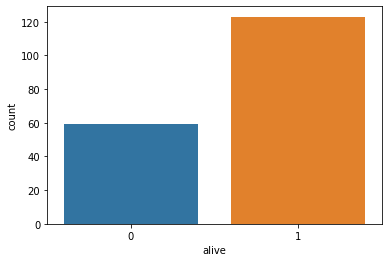

In [12]:
#plotting the above ratio 
sns.countplot(titanic['alive'])

Text(0, 0.5, 'alive')

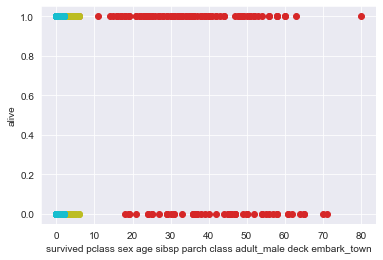

In [13]:
# making a multivariate scatter plot

X1=titanic['survived']
X2=titanic['pclass']
X3=titanic['sex']
X4=titanic['age']
X5=titanic['sibsp']
X6=titanic['parch']
X7=titanic['class']
X8=titanic['adult_male']
X9=titanic['deck']
X10=titanic['embark_town']

y=titanic['alive']

sns.set_style('darkgrid')

plt.scatter(X1,y)
plt.scatter(X2,y)
plt.scatter(X3,y)
plt.scatter(X4,y)
plt.scatter(X5,y)
plt.scatter(X6,y)
plt.scatter(X7,y)
plt.scatter(X8,y)
plt.scatter(X9,y)
plt.scatter(X10,y)

plt.xlabel('survived pclass sex age sibsp parch class adult_male deck embark_town')
plt.ylabel('alive')




In [14]:
#splitting into training and testing dataset

#Scikit-learn’s train_test_split expects data in the form of features and target. In scikit-learn, a features matrix is a two-dimensional grid of data where rows represent samples and columns represent features.

features = ['survived','pclass','sex','age','sibsp','parch','class','adult_male','deck','embark_town']
X = titanic.loc[:, features]
y = titanic.loc[:, ['alive']]

# #since the X_Train and y_train are 1D arrays hence we will convert them to 2D array

# # X_train=np.array(X_train).reshape(-1,1)

# # X_test=np.array(X_test).reshape(-1,1)  #-1 are the as many no of rows in matrix and there is only 1 column

# X_test  #printing the X_test variable



In [20]:
#using SMOTE (an oversampling technique)

smote=SMOTE()

X, y=smote.fit_resample(X,y)

print('Before SMOTE :', Counter(y))
print('After SMOTE :', Counter(y))

Before SMOTE : Counter({'alive': 1})
After SMOTE : Counter({'alive': 1})


In [40]:
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=23)

ValueError: Found input variables with inconsistent numbers of samples: [246, 182]

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()  #so that data cannot be overpowering used to scale data i.e make the difference betwen data values equal

In [44]:
X_train_scaled = scaler.fit_transform(X_train) #calculates mean and standard dev of data to fit in z (z = (x - u) / s)

In [45]:
X_test_scaled = scaler.transform(X_test) #we dont want to know sd and mean of training data thats why no fit only transform

In [46]:
X_train_scaled  #2D arrays instead of dataframe

array([[ 1.        , -0.37110352,  0.79266549, ...,  0.8295019 ,
         0.44525896, -1.48217581],
       [ 1.        , -0.37110352,  0.79266549, ...,  0.8295019 ,
        -0.26101387,  0.76243611],
       [-1.        , -0.37110352, -1.26156621, ..., -1.20554275,
        -0.9672867 , -1.48217581],
       ...,
       [-1.        , -0.37110352,  0.79266549, ...,  0.8295019 ,
        -0.26101387, -0.35986985],
       [-1.        , -0.37110352,  0.79266549, ...,  0.8295019 ,
        -0.9672867 , -1.48217581],
       [-1.        , -0.37110352,  0.79266549, ...,  0.8295019 ,
         1.15153179,  0.76243611]])

In [47]:
log_reg= LogisticRegression()

In [48]:
log_reg.fit(X_train_scaled,y_train.values.ravel())

LogisticRegression()

In [49]:
log_reg.predict(X_train_scaled) #gives the value of y trained

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0], dtype=int8)

In [50]:
score=log_reg.score(X_test_scaled,y_test)
score

1.0

In [51]:
features = ['survived','pclass','sex','age','sibsp','parch','class','adult_male','deck','embark_town']
x = titanic[features]
y=titanic['alive']

sns.regplot(x=x, y=y, data=titanic, logistic=True, ci=None)

ValueError: regplot inputs must be 1d